# Feature extraction for Fake Review Dataset from Kaggle

In [113]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\limci\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\limci\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [114]:
import re
import nltk
from nltk import word_tokenize
from nltk import pos_tag

In [115]:
df = pd.read_csv("fake reviews dataset.csv")

In [116]:
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [117]:
df.isna().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

# Generate features

In [118]:
# Standard features
df['string_length'] = df.text_.str.len()
df['word_count'] = df['text_'].apply(lambda x: len(x.split()))

In [119]:
# Textblob subjectivity and polarity score
df['polarity'] = df['text_'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
df['subjectivity'] = df['text_'].apply(lambda tweet: TextBlob(tweet).sentiment.subjectivity)

In [120]:
df

,category,rating,label,text_,string_length,word_count,polarity,subjectivity
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor...",75,12,0.473750,0.800000
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I...",80,16,0.558333,0.700000
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...,67,14,0.250000,0.300000
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i...",81,17,0.400000,0.400000
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...,85,18,0.740000,0.800000
...,...,...,...,...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...,1694,329,0.190431,0.486501
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...,1304,270,0.298208,0.652157
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ...",1987,343,0.054640,0.405525
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...,1301,278,0.298997,0.618836


In [121]:
# NLTK POS tagging
df['tokenized'] = df['text_'].str.lower().apply(nltk.word_tokenize)
df['pos_tagged'] = df['tokenized'].apply(nltk.pos_tag)

In [122]:
df['nouns'] = df['pos_tagged'].apply(lambda x: [word for word, tag in x if tag in ['NN', 'NNS']])
df['proper_nouns'] = df['pos_tagged'].apply(lambda x: [word for word, tag in x if tag in ['NNP', 'NNPS']])
df['verbs'] = df['pos_tagged'].apply(lambda x: [word for word, tag in x if tag in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']])
df['adverb'] = df['pos_tagged'].apply(lambda x: [word for word, tag in x if tag in ['RB','RBR','RBS']])
df['adjective'] = df['pos_tagged'].apply(lambda x: [word for word, tag in x if tag in ['JJ','JJR','JJS']])
df['conjunction'] = df['pos_tagged'].apply(lambda x: [word for word, tag in x if tag in ['CC']])
df['determiner'] = df['pos_tagged'].apply(lambda x: [word for word, tag in x if tag in ['DT']])
df['predeterminer'] = df['pos_tagged'].apply(lambda x: [word for word, tag in x if tag in ['PDT']])
df['foreign_words'] = df['pos_tagged'].apply(lambda x: [word for word, tag in x if tag in ['fw']])
df['cardinal_digits'] = df['pos_tagged'].apply(lambda x: [word for word, tag in x if tag in ['CD']])

In [123]:
df['no_nouns'] = df['nouns'].apply(len) 
df['no_proper_nouns'] = df['proper_nouns'].apply(len)
df['no_verbs'] = df['verbs'].apply(len)
df['no_adverb'] = df['adverb'].apply(len)
df['no_adjective'] = df['adjective'].apply(len)
df['no_conjunction'] = df['conjunction'].apply(len)
df['no_determiner'] = df['determiner'].apply(len)
df['no_predeterminer'] = df['predeterminer'].apply(len)
df['no_foreign_words'] = df['foreign_words'].apply(len)
df['no_cardinal_digits'] = df['cardinal_digits'].apply(len)

In [124]:
df['percent_nouns'] = df['no_nouns']/ df['word_count'] 
df['percent_proper_nouns'] = df['no_proper_nouns']/ df['word_count']
df['percent_verbs'] = df['no_verbs']/ df['word_count']
df['percent_adverb'] = df['no_adverb']/ df['word_count']
df['percent_adjective'] = df['no_adjective']/ df['word_count']
df['percent_conjunction'] = df['no_conjunction']/ df['word_count']
df['percent_determiner'] = df['no_determiner']/ df['word_count']
df['percent_predeterminer'] = df['no_predeterminer']/ df['word_count']
df['percent_foreign_words'] = df['no_foreign_words']/ df['word_count']
df['percent_cardinal_digits'] = df['no_cardinal_digits']/ df['word_count']

In [125]:
df.iloc[:,-10:].head()

,percent_nouns,percent_proper_nouns,percent_verbs,percent_adverb,percent_adjective,percent_conjunction,percent_determiner,percent_predeterminer,percent_foreign_words,percent_cardinal_digits
0,0.083333,0.0,0.250000,0.333333,0.166667,0.083333,0.083333,0.0,0.0,0.000000
1,0.250000,0.0,0.187500,0.000000,0.187500,0.000000,0.187500,0.0,0.0,0.000000
2,0.428571,0.0,0.142857,0.000000,0.000000,0.071429,0.214286,0.0,0.0,0.000000
3,0.235294,0.0,0.176471,0.000000,0.058824,0.058824,0.117647,0.0,0.0,0.000000
4,0.166667,0.0,0.277778,0.166667,0.111111,0.055556,0.055556,0.0,0.0,0.055556


# EDA and slicing

In [126]:
df1 = df.copy()

In [127]:
df1.category.unique()

array(['Home_and_Kitchen_5', 'Sports_and_Outdoors_5', 'Electronics_5',
       'Movies_and_TV_5', 'Tools_and_Home_Improvement_5',
       'Pet_Supplies_5', 'Kindle_Store_5', 'Books_5', 'Toys_and_Games_5',
       'Clothing_Shoes_and_Jewelry_5'], dtype=object)

In [138]:
prop_matrix = df1.groupby(['category','label']).agg({'string_length':'mean',
                                     'word_count':'mean',
                                     'polarity':'mean',
                                     'subjectivity':'mean',
                                     'percent_nouns':'mean',
                                     'percent_proper_nouns':'mean',
                                     'percent_verbs':'mean',
                                     'percent_adverb':'mean',
                                     'percent_adjective':'mean',
                                     'percent_conjunction':'mean',
                                     'percent_determiner':'mean',
                                     'percent_predeterminer':'mean',
                                     'percent_foreign_words':'mean',
                                     'percent_cardinal_digits':'mean',
                                    }).reset_index()
prop_matrix
# prop_matrix.to_excel('prop_matrix.xlsx')

,category,label,string_length,word_count,polarity,subjectivity,percent_nouns,percent_proper_nouns,percent_verbs,percent_adverb,percent_adjective,percent_conjunction,percent_determiner,percent_predeterminer,percent_foreign_words,percent_cardinal_digits
0,Books_5,CG,373.759268,73.534554,0.283635,0.531839,0.232717,0.000301,0.212922,0.063464,0.101802,0.040576,0.161513,0.000830,0.0,0.006873
1,Books_5,OR,490.926316,87.912586,0.245854,0.533332,0.247546,0.000709,0.188318,0.071004,0.106824,0.041202,0.116518,0.001324,0.0,0.010152
2,Clothing_Shoes_and_Jewelry_5,CG,250.442308,50.692827,0.283748,0.605123,0.215338,0.000577,0.194209,0.074843,0.138979,0.056933,0.142052,0.000406,0.0,0.018865
3,Clothing_Shoes_and_Jewelry_5,OR,321.572765,61.472973,0.255221,0.559178,0.222346,0.000657,0.193550,0.085906,0.127768,0.047872,0.101517,0.000577,0.0,0.015549
4,Electronics_5,CG,305.798897,61.827984,0.262901,0.570690,0.231783,0.001371,0.202154,0.064050,0.123373,0.039771,0.142140,0.000227,0.0,0.014261
5,Electronics_5,OR,408.055667,75.618857,0.240498,0.531601,0.238323,0.001031,0.193342,0.078353,0.111832,0.041743,0.104409,0.000944,0.0,0.017988
6,Home_and_Kitchen_5,CG,272.325444,55.329882,0.288971,0.602528,0.218532,0.000717,0.202300,0.072331,0.125157,0.047238,0.137812,0.000213,0.0,0.011027
7,Home_and_Kitchen_5,OR,350.193294,65.811144,0.260999,0.564535,0.228824,0.000843,0.198240,0.082944,0.115199,0.043697,0.104680,0.000925,0.0,0.012308
8,Kindle_Store_5,CG,374.706554,72.795772,0.332904,0.544088,0.243023,0.000175,0.216107,0.062814,0.100702,0.041975,0.164443,0.000639,0.0,0.005593
9,Kindle_Store_5,OR,473.450740,87.339112,0.266550,0.550259,0.238920,0.000791,0.201319,0.072482,0.102578,0.042646,0.115134,0.001633,0.0,0.009833


In [140]:
prop_matrix2 = df1.groupby(['label']).agg({'string_length':'mean',
                                     'word_count':'mean',
                                     'polarity':'mean',
                                     'subjectivity':'mean',
                                     'percent_nouns':'mean',
                                     'percent_proper_nouns':'mean',
                                     'percent_verbs':'mean',
                                     'percent_adverb':'mean',
                                     'percent_adjective':'mean',
                                     'percent_conjunction':'mean',
                                     'percent_determiner':'mean',
                                     'percent_predeterminer':'mean',
                                     'percent_foreign_words':'mean',
                                     'percent_cardinal_digits':'mean',
                                    }).reset_index()
prop_matrix2
# prop_matrix2.to_excel('prop_matrix_label.xlsx')

,label,string_length,word_count,polarity,subjectivity,percent_nouns,percent_proper_nouns,percent_verbs,percent_adverb,percent_adjective,percent_conjunction,percent_determiner,percent_predeterminer,percent_foreign_words,percent_cardinal_digits
0,CG,305.573506,61.288237,0.276765,0.569741,0.226714,0.000709,0.202812,0.065910,0.118666,0.043997,0.148060,0.000382,0.0,0.012131
1,OR,396.970419,73.642610,0.248204,0.543236,0.234629,0.000868,0.193673,0.078097,0.111794,0.042693,0.106841,0.001065,0.0,0.014701


In [129]:
import seaborn as sns

In [130]:
df1['tgt_bool'] = df1['label'].apply(lambda x: 1 if x =='OR' else 0)

<Axes: >

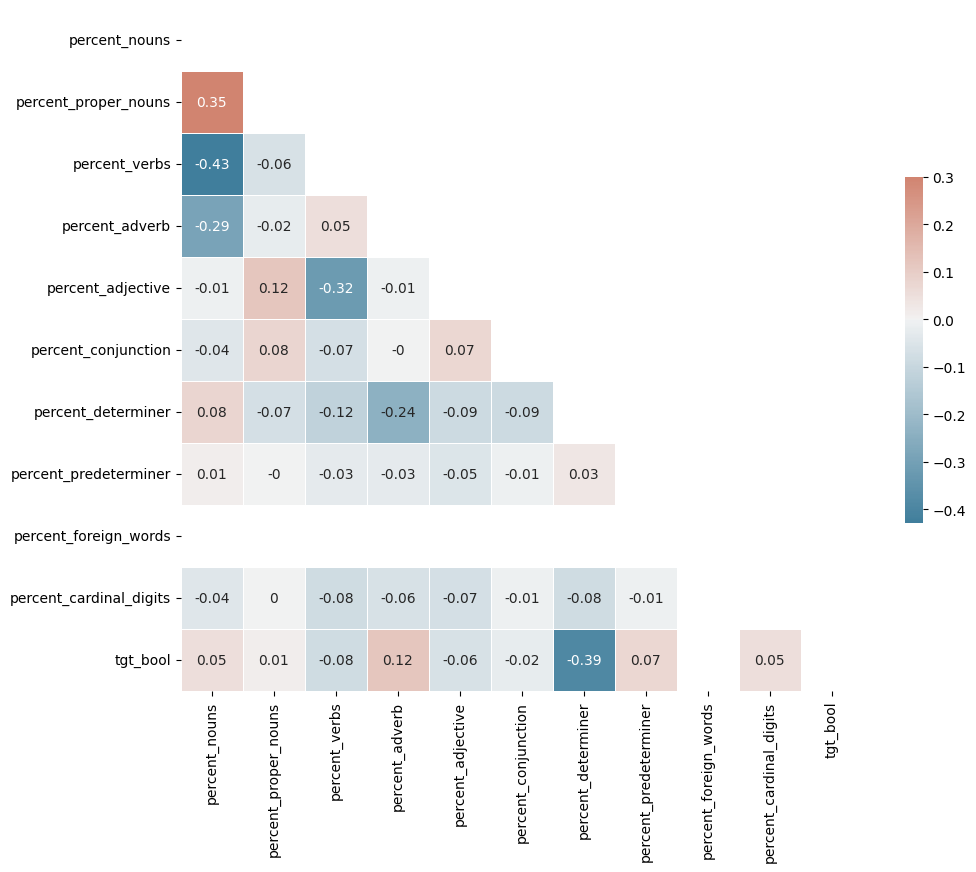

In [131]:
corr = df1[df1.columns.tolist()[-11:]].corr()
corr = np.round(corr, 2)
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<Axes: >

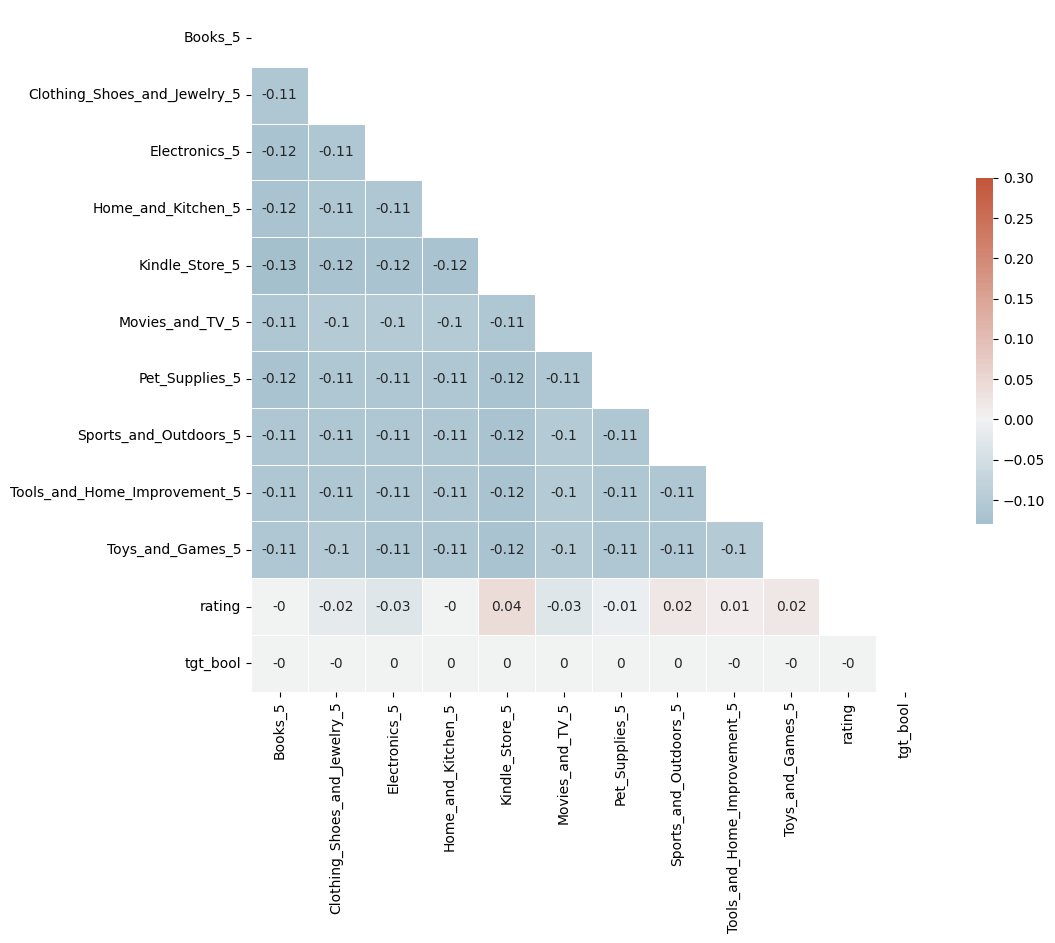

In [137]:
category = pd.get_dummies(df1['category'])
df2 = pd.concat([df1,category], axis = 1)
corr = df2[category.columns.tolist() + ['rating','tgt_bool']].corr()
corr = np.round(corr, 2)
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [141]:
# sns.barplot(df, x = 'category', y = 'string_length', hue = 'label')
# plt.xticks(rotation=70)
# plt.tight_layout()

In [144]:
# sns.barplot(df, x = 'category', y = 'word_count', hue = 'label')
# plt.xticks(rotation=70)
# plt.tight_layout()

In [145]:
# sns.barplot(df, x = 'category', y = 'subjectivity', hue = 'label')
# plt.xticks(rotation=70)
# plt.tight_layout()

In [146]:
# sns.barplot(df, x = 'category', y = 'polarity', hue = 'label')
# plt.xticks(rotation=70)
# plt.tight_layout()